<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.572651,91.579261,80.229574,0.001109,262.382595,262.379550,0.003045
1,0.0,1.0,78.946605,52.945020,21.971366,0.006837,163.869828,163.862686,0.007142
2,0.0,2.0,48.671407,36.467036,59.715341,-0.052893,154.800891,154.852119,-0.051228
3,0.0,3.0,97.954224,98.076822,89.530857,-0.006168,295.555735,295.558017,-0.002282
4,0.0,4.0,29.030548,98.803789,95.329987,0.035148,233.199471,233.166943,0.032528
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.781745,28.545694,51.312752,0.045067,172.685258,172.637085,0.048173
249996,999.0,246.0,83.403896,24.418041,89.380915,0.118475,207.321327,207.198599,0.122729
249997,999.0,247.0,87.328707,96.557102,49.467845,-0.043807,243.309847,243.354549,-0.044702
249998,999.0,248.0,37.547885,36.875985,86.214710,0.075258,170.713837,170.639003,0.074835


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    80.572651  91.579261  80.229574  0.001109  262.382595   
      1.0    78.946605  52.945020  21.971366  0.006837  163.869828   
      2.0    48.671407  36.467036  59.715341 -0.052893  154.800891   
      3.0    97.954224  98.076822  89.530857 -0.006168  295.555735   
      4.0    29.030548  98.803789  95.329987  0.035148  233.199471   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.781745  28.545694  51.312752  0.045067  172.685258   
      246.0  83.403896  24.418041  89.380915  0.118475  207.321327   
      247.0  87.328707  96.557102  49.467845 -0.043807  243.309847   
      248.0  37.547885  36.875985  86.214710  0.075258  170.713837   
      249.0  95.528107  46.963368  84.616873 -0.024767  237.083582   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.379550  0.003045  
      1.0    163.862686  0.007142  
      2.0    154.852119 -0.051228  
      3.0    295.558017 -0.002282  
      4.0    233.166943  0.032528  
...                 ...       ...  
999.0 245.0  172.637085  0.048173  
      246.0  207.198599  0.122729  
      247.0  243.354549 -0.044702  
      248.0  170.639003  0.074835  
      249.0  237.104629 -0.021047  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    80.572651  91.579261  80.229574  0.001109  262.382595   
      1.0    78.946605  52.945020  21.971366  0.006837  163.869828   
      2.0    48.671407  36.467036  59.715341 -0.052893  154.800891   
      3.0    97.954224  98.076822  89.530857 -0.006168  295.555735   
      4.0    29.030548  98.803789  95.329987  0.035148  233.199471   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.781745  28.545694  51.312752  0.045067  172.685258   
      246.0  83.403896  24.418041  89.380915  0.118475  207.321327   
      247.0  87.328707  96.557102  49.467845 -0.043807  243.309847   
      248.0  37.547885  36.875985  86.214710  0.075258  170.713837   
      249.0  95.528107  46.963368  84.616873 -0.024767  237.083582   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.379550  0.003045  
      1.0    163.862686  0.007142  
      2.0    154.852119 -0.051228  
      3.0    295.558017 -0.002282  
      4.0    233.166943  0.032528  
...                 ...       ...  
999.0 245.0  172.637085  0.048173  
      246.0  207.198599  0.122729  
      247.0  243.354549 -0.044702  
      248.0  170.639003  0.074835  
      249.0  237.104629 -0.021047  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,80.572651,91.579261,80.229574,0.001109,262.382595,262.379550,0.003045
1,0.0,1.0,78.946605,52.945020,21.971366,0.006837,163.869828,163.862686,0.007142
2,0.0,2.0,48.671407,36.467036,59.715341,-0.052893,154.800891,154.852119,-0.051228
3,0.0,3.0,97.954224,98.076822,89.530857,-0.006168,295.555735,295.558017,-0.002282
4,0.0,4.0,29.030548,98.803789,95.329987,0.035148,233.199471,233.166943,0.032528
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.781745,28.545694,51.312752,0.045067,172.685258,172.637085,0.048173
249996,999.0,246.0,83.403896,24.418041,89.380915,0.118475,207.321327,207.198599,0.122729
249997,999.0,247.0,87.328707,96.557102,49.467845,-0.043807,243.309847,243.354549,-0.044702
249998,999.0,248.0,37.547885,36.875985,86.214710,0.075258,170.713837,170.639003,0.074835


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    80.572651  91.579261  80.229574  0.001109  262.382595   
      1.0    78.946605  52.945020  21.971366  0.006837  163.869828   
      2.0    48.671407  36.467036  59.715341 -0.052893  154.800891   
      3.0    97.954224  98.076822  89.530857 -0.006168  295.555735   
      4.0    29.030548  98.803789  95.329987  0.035148  233.199471   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.781745  28.545694  51.312752  0.045067  172.685258   
      246.0  83.403896  24.418041  89.380915  0.118475  207.321327   
      247.0  87.328707  96.557102  49.467845 -0.043807  243.309847   
      248.0  37.547885  36.875985  86.214710  0.075258  170.713837   
      249.0  95.528107  46.963368  84.616873 -0.024767  237.083582   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    262.379550  0.003045  
      1.0    163.862686  0.007142  
      2.0    154.852119 -0.051228  
      3.0    295.558017 -0.002282  
      4.0    233.166943  0.032528  
...                 ...       ...  
999.0 245.0  172.637085  0.048173  
      246.0  207.198599  0.122729  
      247.0  243.354549 -0.044702  
      248.0  170.639003  0.074835  
      249.0  237.104629 -0.021047  

[250000 rows x 7 columns]

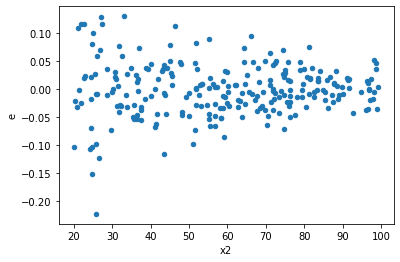

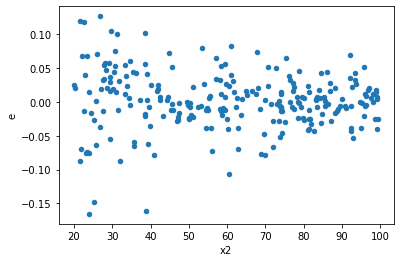

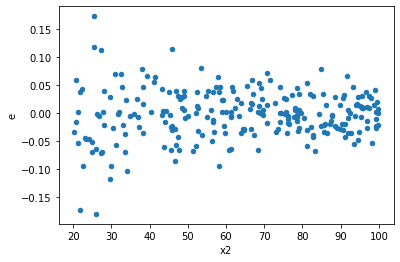

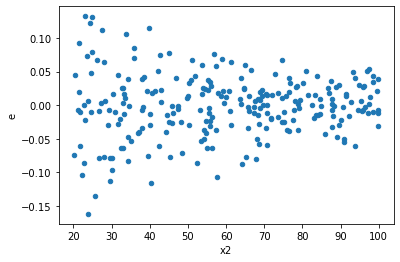

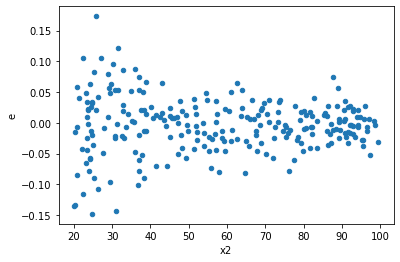

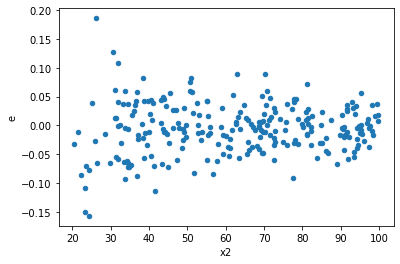

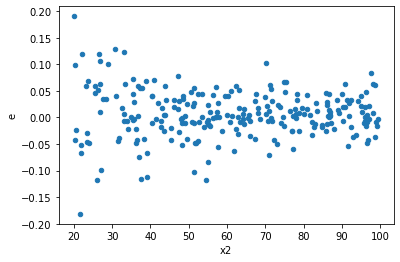

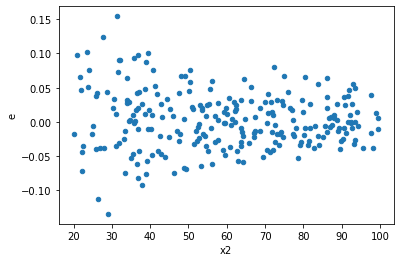

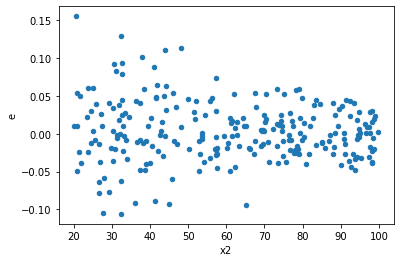

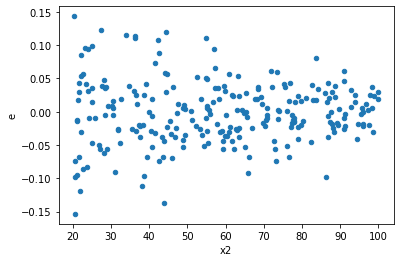

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,133.0,111.0,0.11062028200609816,0.3416716693317646,0.0008317314436548734,0.003078123147133015,3.700861823387166,8.943290552565486e-12,0.9999999999955284,4.471645276282743e-12,Reject001=0 : Heteroscedasticity
3.0,109.0,135.0,0.21477601593852577,0.3057712909282558,0.001970422164573631,0.002264972525394487,1.149485915311246,0.4404118794384211,0.7797940602807895,0.22020593971921054,Reject001=1 : Homoscedasticity
4.0,115.0,129.0,0.09426665652191178,0.4043768668524783,0.0008197100567122763,0.003134704394205258,3.824162420036723,5.297984273511247e-13,0.9999999999997351,2.6489921367556235e-13,Reject001=0 : Heteroscedasticity
5.0,127.0,117.0,0.18129939281878898,0.2950439410714281,0.0014275542741636928,0.0025217430860805822,1.7664779068087624,0.0019464346728887971,0.9990267826635556,0.0009732173364443986,Reject001=0 : Heteroscedasticity
7.0,111.0,133.0,0.1377444163430055,0.29163704960022846,0.0012409406877748243,0.0021927597714302893,1.7670141635553962,0.0017126950253982809,0.9991436524873009,0.0008563475126991404,Reject001=0 : Heteroscedasticity
8.0,137.0,107.0,0.12080995916313811,0.2569559208194243,0.0008818245194389643,0.0024014572039198533,2.723282411615989,1.4180517515782753e-07,0.9999999290974124,7.090258757891377e-08,Reject001=0 : Heteroscedasticity
12.0,140.0,104.0,0.22139603661657065,0.19151570249574731,0.0015814002615469331,0.0018414971393821858,1.164472514745144,0.4136356649526143,0.7931821675236929,0.20681783247630714,Reject001=1 : Homoscedasticity
15.0,125.0,119.0,0.09784183560789544,0.4246019018402718,0.0007827346848631636,0.00356808320874178,4.558483580378895,1.7763568394002505e-15,0.9999999999999991,8.881784197001252e-16,Reject001=0 : Heteroscedasticity
16.0,123.0,121.0,0.12884434522908164,0.4232943695880765,0.0010475150018624524,0.00349830057510807,3.339618591512474,1.122637538486515e-10,0.9999999999438681,5.613187692432575e-11,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,113.0,131.0,0.2664105538364931,0.2763371452211173,0.00235761552067693,0.00210944385664975,0.8947361595431288,0.5445962775870428,Reject001=1 : Homoscedasticity
1.0,114.0,130.0,0.3129166925763457,0.12468706245170856,0.0027448832682135586,0.0009591312496285274,0.34942515069238445,2.227659116405569e-08,Reject001=0 : Heteroscedasticity
2.0,133.0,111.0,0.11062028200609816,0.3416716693317646,0.0008317314436548734,0.003078123147133015,3.700861823387166,8.943290552565486e-12,Reject001=0 : Heteroscedasticity
3.0,109.0,135.0,0.21477601593852577,0.3057712909282558,0.001970422164573631,0.002264972525394487,1.149485915311246,0.4404118794384211,Reject001=1 : Homoscedasticity
4.0,115.0,129.0,0.09426665652191178,0.4043768668524783,0.0008197100567122763,0.003134704394205258,3.824162420036723,5.297984273511247e-13,Reject001=0 : Heteroscedasticity
5.0,127.0,117.0,0.18129939281878898,0.2950439410714281,0.0014275542741636928,0.0025217430860805822,1.7664779068087624,0.0019464346728887971,Reject001=0 : Heteroscedasticity
6.0,116.0,128.0,0.32241671861413473,0.17000964138563018,0.0027794544708115063,0.0013282003233252358,0.47786367334790214,6.50226841221941e-05,Reject001=0 : Heteroscedasticity
7.0,111.0,133.0,0.1377444163430055,0.29163704960022846,0.0012409406877748243,0.0021927597714302893,1.7670141635553962,0.0017126950253982809,Reject001=0 : Heteroscedasticity
8.0,137.0,107.0,0.12080995916313811,0.2569559208194243,0.0008818245194389643,0.0024014572039198533,2.723282411615989,1.4180517515782753e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      561
Reject001=0 : Heteroscedasticity    439
Name: Result_test, dtype: int64